In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


Reading and over sampling the data

In [12]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int)  # Ensure the target is treated as an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3548: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
#spliting data 10% val 10% test select_dtypes
X_test,X_val,y_test,y_val= train_test_split(X_test, y_test, test_size=0.5, random_state=42)


XGBoost with over sampling

In [14]:
import xgboost as xgb

xgBoost_model = xgb.XGBClassifier()
xgBoost_model.fit(X_train, y_train)

# Make predictions
y_pred = xgBoost_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred,average='weighted')

report = classification_report(y_val, y_pred)

print("Accuracy of validation set:", accuracy)
print("f1_score weighted of validation set: ", f1)
print("Classification Report of validation data:\n", report)
y_pred = xgBoost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average='weighted')

report = classification_report(y_test, y_pred)

print("Accuracy of test data:", accuracy)
print("f1_score_weighted of test data: ", f1)

print("Classification Report of test data:\n", report)

Accuracy of validation set: 0.7933333333333333
f1_score weighted of validation set:  0.7292982456140351
Classification Report of validation data:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       117
           1       0.80      0.29      0.42        14
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        14

    accuracy                           0.79       150
   macro avg       0.40      0.32      0.33       150
weighted avg       0.70      0.79      0.73       150

Accuracy of test data: 0.8066666666666666
f1_score_weighted of test data:  0.7447866098449756
Classification Report of test data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89       116
           1       0.62      0.42      0.50        12
           2       0.00      0.00      0.00         2
           3       1.00      0.05      0.10        20

    accuracy   

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Plot learning Curve

C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\Legend\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
  F

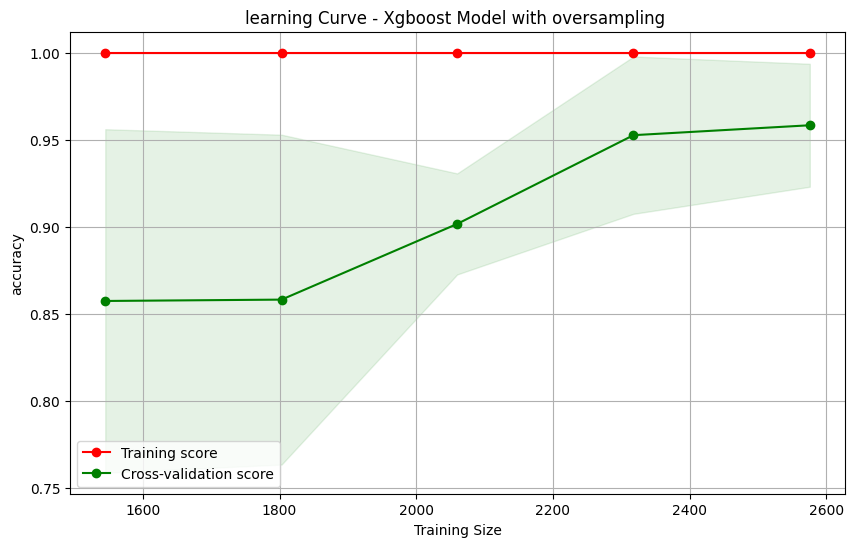

In [5]:
def plot_learning_curves(model, x, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, x, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))#, shuffle=True, random_state=42

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("accuracy")
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
plot_learning_curves(xgBoost_model, X_train, y_train, "learning Curve - Xgboost Model with oversampling ")

# Read the test file

Add the test name file below before run it 

In [ ]:
file_path = ''#put the file path and name
data = pd.read_csv(file_path)

# Assume 'target_column_name' is your categorical target; replace it with your actual column name
target_column_name = 'cancer_type'  # Replace 'cancer_type' with your actual target column

# Encode categorical variables, including the target if it's not numerically categorical
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Impute missing values for all columns
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Normalize only the feature data, exclude target
feature_columns = [col for col in data.columns if col != target_column_name]
scaler = StandardScaler()
data[feature_columns] = scaler.fit_transform(data[feature_columns])

# Split the data
X = data[feature_columns]
y = data[target_column_name].astype(int) 

X_test_new=X
y_test_new= y

Since already model is trained in the above data we just need to predict the output of the new test data

In [ ]:
y_pred_1 = xgBoost_model.predict(X_test_new)

# Evaluate the model
accuracy = accuracy_score(y_test_new, y_pred_1)
f1 = f1_score(y_test_new, y_pred_1,average='weighted')


print("Accuracy of new test data:", accuracy)
print("f1_score_weighted of new test data: ", f1)

